### Data Preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif #classif for classification prob., regression (continous values)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
## Read dataset
df = pd.read_excel(r'C:\Users\Admin\predicting-customer-churn\E_Commerce_Dataset.xlsx', 'E Comm')
print(df.shape)
df.head()

(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
#get the number of missing values
df.columns  = df.columns.str.lower()
print(df.isnull().sum())

customerid                       0
churn                            0
tenure                         264
preferredlogindevice             0
citytier                         0
warehousetohome                251
preferredpaymentmode             0
gender                           0
hourspendonapp                 255
numberofdeviceregistered         0
preferedordercat                 0
satisfactionscore                0
maritalstatus                    0
numberofaddress                  0
complain                         0
orderamounthikefromlastyear    265
couponused                     256
ordercount                     258
daysincelastorder              307
cashbackamount                   0
dtype: int64


In [5]:
#get the unique values in daysincelastorder variable
df.daysincelastorder.value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: daysincelastorder, dtype: int64

In [6]:
#fill missing values in 'daysincelastorder' with 0
df['daysincelastorder'] = df['daysincelastorder'].fillna(0)

# # Fill missing values with mean
# df.fillna(df.mean(), inplace=True)

In [7]:
# Calculate the percentage of missing values for each variable
missing_values = df.isnull().mean() * 100
print("Percentage of missing values:")
print(missing_values)

Percentage of missing values:
customerid                     0.000000
churn                          0.000000
tenure                         4.689165
preferredlogindevice           0.000000
citytier                       0.000000
warehousetohome                4.458259
preferredpaymentmode           0.000000
gender                         0.000000
hourspendonapp                 4.529307
numberofdeviceregistered       0.000000
preferedordercat               0.000000
satisfactionscore              0.000000
maritalstatus                  0.000000
numberofaddress                0.000000
complain                       0.000000
orderamounthikefromlastyear    4.706927
couponused                     4.547069
ordercount                     4.582593
daysincelastorder              0.000000
cashbackamount                 0.000000
dtype: float64


In [8]:
#drop missing values
# df.dropna(inplace=True), df.reset_index()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
#confirm the missing values are dropped
df.isnull().sum()

customerid                     0
churn                          0
tenure                         0
preferredlogindevice           0
citytier                       0
warehousetohome                0
preferredpaymentmode           0
gender                         0
hourspendonapp                 0
numberofdeviceregistered       0
preferedordercat               0
satisfactionscore              0
maritalstatus                  0
numberofaddress                0
complain                       0
orderamounthikefromlastyear    0
couponused                     0
ordercount                     0
daysincelastorder              0
cashbackamount                 0
dtype: int64

In [10]:
print(df.customerid.nunique())
# check number of rows and columns
df.shape

4081


(4081, 20)

### Exploratory Data Analysis

In [11]:
#get the summarry statistics of numerical varianles 
df.describe()

,customerid,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000
mean,53056.921098,0.167851,8.996569,1.723107,15.773340,2.995099,3.782896,3.052928,4.252879,0.281304,15.761578,1.791963,2.962754,4.185739,168.467302
std,1606.554842,0.373780,7.756180,0.941826,8.566083,0.719460,1.019136,1.390846,2.563652,0.449690,3.645203,1.776368,2.658889,3.454863,27.616749
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51702.000000,0.000000,2.000000,1.000000,9.000000,3.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,149.040000
50%,53216.000000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.160000
75%,54419.000000,0.000000,14.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,183.550000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
#check the datatypes 
df.dtypes

customerid                       int64
churn                            int64
tenure                         float64
preferredlogindevice            object
citytier                         int64
warehousetohome                float64
preferredpaymentmode            object
gender                          object
hourspendonapp                 float64
numberofdeviceregistered         int64
preferedordercat                object
satisfactionscore                int64
maritalstatus                   object
numberofaddress                  int64
complain                         int64
orderamounthikefromlastyear    float64
couponused                     float64
ordercount                     float64
daysincelastorder              float64
cashbackamount                 float64
dtype: object

In [13]:
df.columns

Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [14]:
#check the number of churn and non churn
print(df.churn.value_counts())


0    3396
1     685
Name: churn, dtype: int64


In [15]:
# Calculate the count of churn and non-churn values
churn_count = df['churn'].sum()
non_churn_count = len(df) - churn_count

# Calculate the percentage of churn and non-churn values
churn_percentage = (df['churn'].sum() / len(df)) * 100
non_churn_percentage = 100 - churn_percentage

print(f'Churn Percentage: {churn_percentage:.2f}%')
print(f'Non-Churn Percentage: {non_churn_percentage:.2f}%')

Churn Percentage: 16.79%
Non-Churn Percentage: 83.21%


In [16]:
# visualze the % of churn and non churn
fig = px.pie(
    names=['Churn', 'Non-Churn'],
    values=[churn_count, non_churn_count],
    title='% of Churn vs. Non-Churn',
    color_discrete_sequence=[ 'green', 'red'],
)

# Add annotations to display both count and percentage
fig.update_traces(textinfo='value+percent', pull=[0, 0.1])
fig.show()


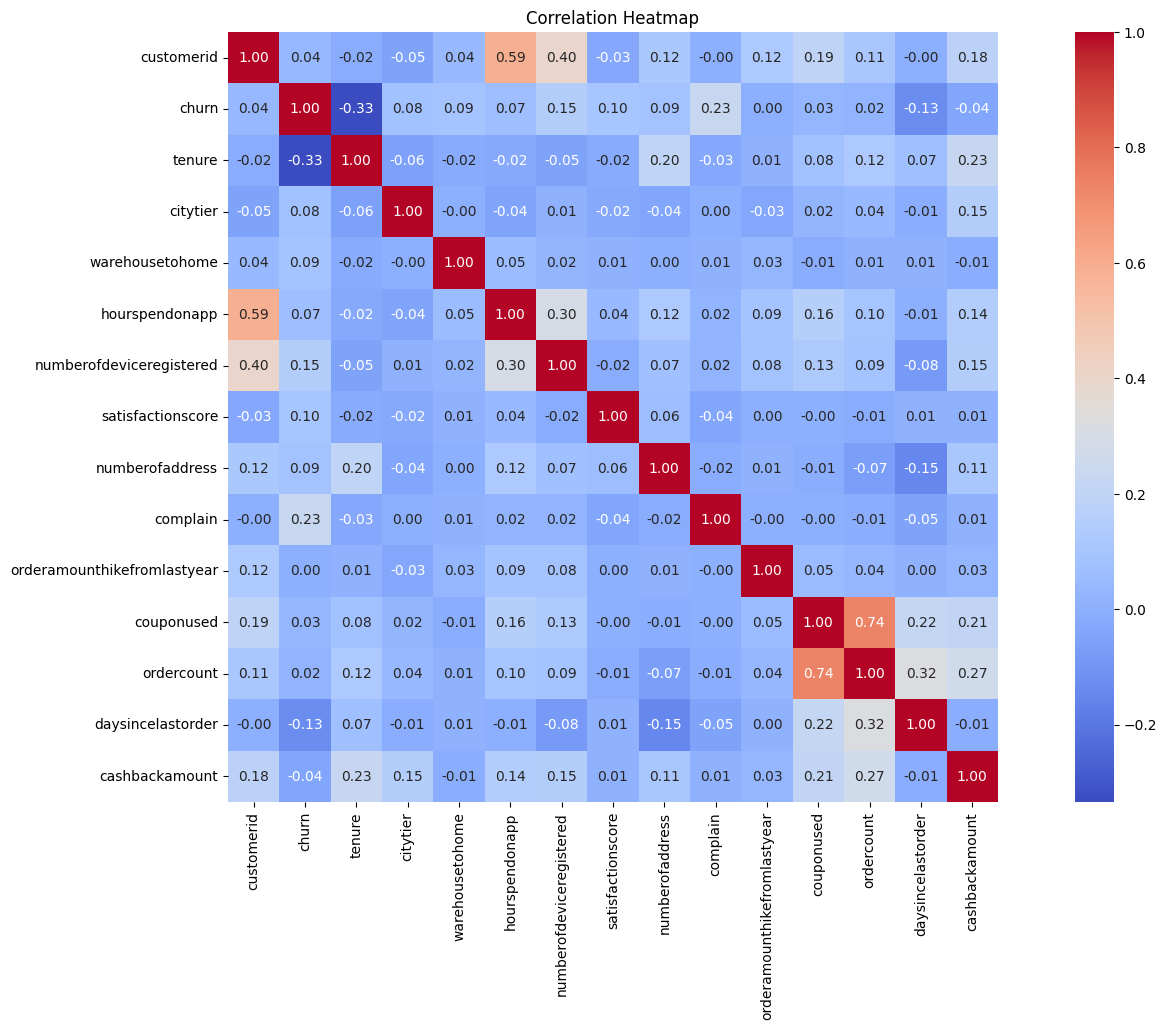

In [17]:
#check the correlation to see the values impacting the churn level
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [18]:
# # Result 
# weak positive correlation between churn and complain(0.23), 
    # churn and numberofdeviceregistered (0.15), churn and satisfactionscore(0.10)

In [19]:
df[['complain', 'numberofdeviceregistered', 'satisfactionscore']].nunique()

complain                    2
numberofdeviceregistered    6
satisfactionscore           5
dtype: int64

In [20]:
complain = df.groupby('complain')['churn'].value_counts().unstack(fill_value=0)
complain

churn,0,1
complain,,
0,2599,334
1,797,351


In [21]:
satis = df.groupby('numberofdeviceregistered')['churn'].value_counts().unstack(fill_value=0)
satis

churn,0,1
numberofdeviceregistered,,
1,128,8
2,207,20
3,893,126
4,1537,309
5,541,170
6,90,52


In [22]:
# Group by 'daysincelastorder' by count of non churn and churn values (0 and 1)
    # (to identify if the customer churning are old or new customer)
grouped = df.groupby(['complain', 'numberofdeviceregistered', 'satisfactionscore'])['churn'].value_counts().unstack(fill_value=0)
grouped

churn                                                  0   1
complain numberofdeviceregistered satisfactionscore         
0        1                        1                   19   0
                                  2                    5   0
                                  3                   38   1
                                  4                   10   2
                                  5                   26   2
         2                        1                   30   0
                                  2                   17   0
                                  3                   55   2
                                  4                   23   3
                                  5                   32   6
         3                        1                  140  10
                                  2                   79   6
                                  3                  190  21
                                  4                  143  11
                                  5                  112  16
         4                        1                  258  17
                                  2                  130   9
                                  3                  338  44
                                  4                  248  22
                                  5                  209  52
         5                        1                   82  13
                                  2                   45   7
                                  3                  134  14
                                  4                   81  16
                                  5                   82  32
         6                        1                   17   4
                                  2                    7   4
                                  3                   31  10
                                  4                    8   6
                                  5                   10   4
1        1                        1                    6   1
                                  2                    2   0
                                  3                    7   2
                                  4                    5   0
                                  5                   10   0
         2                        1                   12   1
                                  2                    6   1
                                  3                   11   5
                                  4                    8   0
                                  5                   13   2
         3                        1                   61  13
                                  2                   24   4
                                  3                   72  21
                                  4                   24   8
                                  5                   48  16
         4                        1                   98  26
                                  2                   43  12
                                  3                  102  54
                                  4                   54  33
                                  5                   57  40
         5                        1                   32  12
                                  2                   15   8
                                  3                   25  32
                                  4                   29  18
                                  5                   16  18
         6                        1                    9   6
                                  2                    2   4
                                  3                    2   6
                                  4                    0   2
                                  5                    4   6

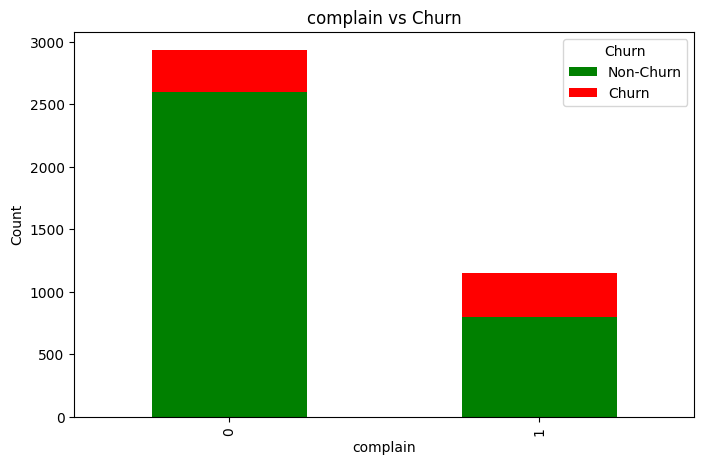

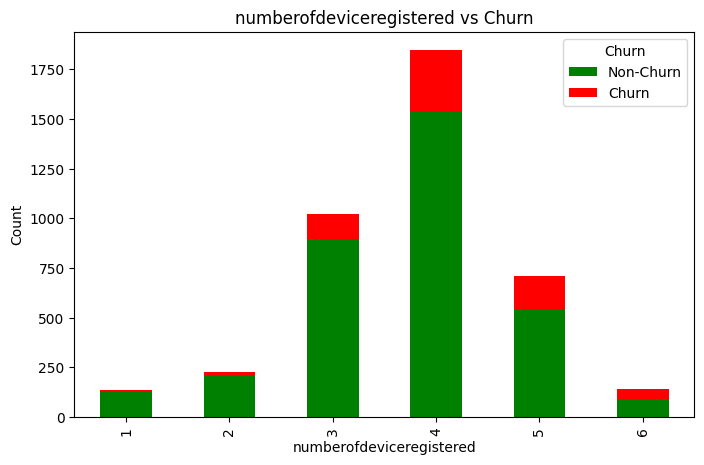

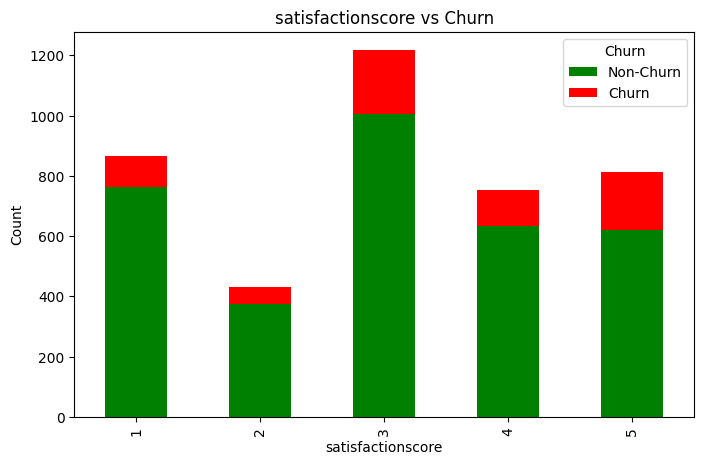

In [23]:
# Create three separate bar charts, one for each variable
variables = ['complain', 'numberofdeviceregistered', 'satisfactionscore']

# Define colors for churn and non-churn
colors = {1: 'red', 0: 'green'}

for variable in variables:
    # Group the data
    grouped = df.groupby([variable, 'churn'])['churn'].count().unstack(fill_value=0)

    # Plot the data using a bar chart with custom colors
    plt.figure(figsize=(8, 5))
    ax = plt.subplot(111)
    grouped.plot(kind='bar', stacked=True, ax=ax, color=[colors[churn] for churn in grouped.columns])
    plt.title(f'{variable} vs Churn')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['Non-Churn', 'Churn'])


    plt.show()

## Feature Enginnering 

In [24]:
df.tenure.unique()

array([ 4.,  0., 11.,  9., 19., 20., 14.,  8.,  5.,  2., 30., 13.,  3.,
       18., 29., 23., 26.,  7., 10., 15., 22.,  1., 24., 27., 25., 12.,
       28.,  6., 16., 21., 17., 50., 31., 51.])

In [25]:
#add features tenure_group
# Define the tenure group thresholds
tenure_thresholds = [0, 5, 10, 15, float('inf')]  # Define your own thresholds

# Define labels for the tenure groups
tenure_labels = ['New', 'Regular', 'Intermediate', 'Loyal']

# Use the cut() function to create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_thresholds, labels=tenure_labels, right=False)

# Print the resulting DataFrame
df.head(100)

,customerid,churn,tenure,preferredlogindevice,citytier,warehousetohome,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,...,satisfactionscore,maritalstatus,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,tenure_group
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,New
1,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,New
2,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,5,Single,2,1,22.0,4.0,6.0,7.0,139.19,New
3,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,3,Single,10,1,13.0,0.0,1.0,0.0,153.81,Intermediate
4,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,3,Single,2,1,13.0,2.0,2.0,2.0,134.41,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50175,0,24.0,Mobile Phone,1,8.0,Credit Card,Male,2.0,5,...,4,Married,6,0,18.0,0.0,1.0,2.0,154.82,Loyal
96,50177,0,0.0,Mobile Phone,3,16.0,Credit Card,Female,3.0,4,...,3,Single,2,0,12.0,1.0,1.0,0.0,112.00,New
97,50178,0,1.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,2,...,5,Single,1,0,19.0,0.0,1.0,7.0,156.61,New
98,50179,0,4.0,Mobile Phone,3,13.0,COD,Male,3.0,2,...,2,Divorced,5,0,11.0,3.0,7.0,7.0,169.29,New


In [26]:
df.dtypes

customerid                        int64
churn                             int64
tenure                          float64
preferredlogindevice             object
citytier                          int64
warehousetohome                 float64
preferredpaymentmode             object
gender                           object
hourspendonapp                  float64
numberofdeviceregistered          int64
preferedordercat                 object
satisfactionscore                 int64
maritalstatus                    object
numberofaddress                   int64
complain                          int64
orderamounthikefromlastyear     float64
couponused                      float64
ordercount                      float64
daysincelastorder               float64
cashbackamount                  float64
tenure_group                   category
dtype: object

## Feature Selection

In [27]:
df.columns

Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount', 'tenure_group'],
      dtype='object')

In [28]:
# # Apply label encoding to the 'tenure_group' feature
# label_encoder = LabelEncoder()
# df['tenure_group'] = label_encoder.fit_transform(df['tenure_group'])

# # apply one-hot encoding to the remaining categorical features
# categorical_features = ['preferredlogindevice', 'preferredpaymentmode', 'gender', 'preferedordercat', 'maritalstatus']
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [29]:
# # drop the 'customerid' column
# df = df.drop(columns=['customerid'])

# Apply label encoding
label_encoder = LabelEncoder()
categorical_features = ['preferredlogindevice', 'preferredpaymentmode', 'gender', 'preferedordercat', 'maritalstatus', 'tenure_group']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [30]:
df.head(2)

,customerid,churn,tenure,preferredlogindevice,citytier,warehousetohome,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,...,satisfactionscore,maritalstatus,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,tenure_group
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,...,2,2,9,1,11.0,1.0,1.0,5.0,159.93,2
1,50004,1,0.0,2,3,15.0,4,1,2.0,4,...,5,2,8,0,23.0,0.0,1.0,3.0,134.07,2


In [31]:
print(df.columns)
df.shape

Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount', 'tenure_group'],
      dtype='object')


(4081, 21)

In [32]:
#define function for mutual information score
def calculate_mutual_information(df, target_column, random_seed=None):
    """
    Calculate Mutual Information scores for feature selection.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - target_column: Name of the target variable column.
    
    Returns:
    - Dictionary of feature names and their Mutual Information scores.
    """
    features = df.drop(target_column, axis=1)  # Exclude the target column
    target = df[target_column]

    if random_seed is not None:
        np.random.seed(random_seed)
    
    mutual_info = mutual_info_classif(features, target)
    
    mutual_info_scores = {feature: score for feature, score in zip(features.columns, mutual_info)}
    
    return mutual_info_scores

In [33]:
# Define the target variable column
# Set a random seed for reproducibility
random_seed = 42
target_column = 'churn'

# Calculate Mutual Information scores
mutual_info_scores = calculate_mutual_information(df, target_column, random_seed)

# Print the Mutual Information scores
print("Mutual Information Scores:")
for feature, score in mutual_info_scores.items():
    print(f"{feature}: {score}")

Mutual Information Scores:
customerid: 0.025992898822322807
tenure: 0.1320429074783771
preferredlogindevice: 0.004696868274087995
citytier: 0.005759235208137037
warehousetohome: 0.0
preferredpaymentmode: 0.0
gender: 0.0
hourspendonapp: 0.0005083423752596516
numberofdeviceregistered: 0.00986897027242506
preferedordercat: 0.020781587863059725
satisfactionscore: 0.003537694144756909
maritalstatus: 0.011656645407788435
numberofaddress: 0.008216965482021665
complain: 0.022376983983786847
orderamounthikefromlastyear: 0.0
couponused: 0.006046095601212054
ordercount: 0.0006347147888370319
daysincelastorder: 0.014994864204211034
cashbackamount: 0.13550798200285774
tenure_group: 0.07853396164659965


In [34]:
# Convert the scores to a Pandas DataFrame for easier plotting
mi_df = pd.DataFrame.from_dict(mutual_info_scores, orient='index', columns=['Mutual Information'])

# Sort the features by their Mutual Information scores for better visualization
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
mi_df

,Mutual Information
cashbackamount,0.135508
tenure,0.132043
tenure_group,0.078534
customerid,0.025993
complain,0.022377
preferedordercat,0.020782
daysincelastorder,0.014995
maritalstatus,0.011657
numberofdeviceregistered,0.009869
numberofaddress,0.008217


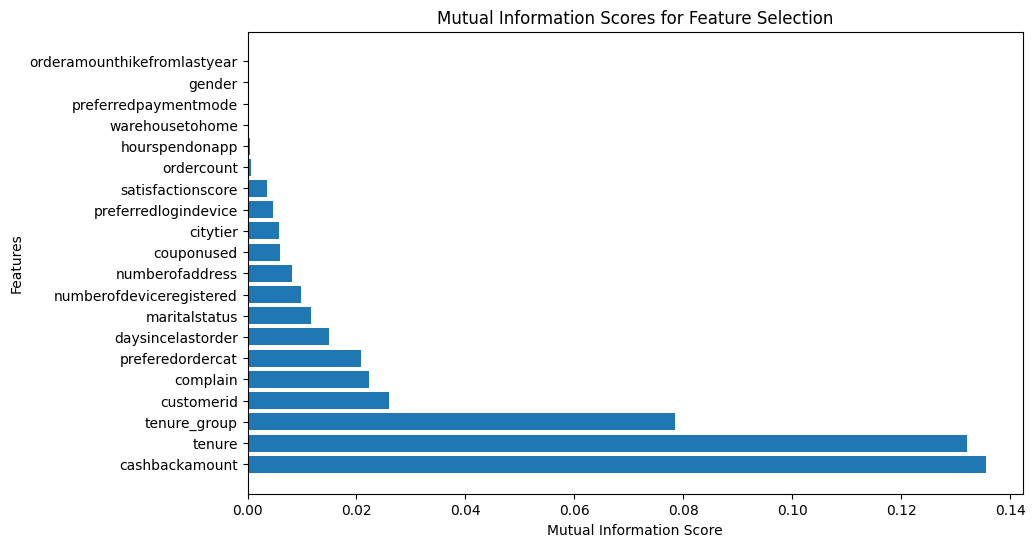

In [35]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(mi_df.index, mi_df['Mutual Information'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Feature Selection')
plt.show()

In [36]:
# couponused and tier has low or no predictive power regarding the target variable

In [37]:
# drop the low predictive variables 
df = df.drop(columns=['warehousetohome','orderamounthikefromlastyear','preferredpaymentmode','gender'])
print(df.shape)
print(df.columns)
df.head(2)


(4081, 17)
Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'hourspendonapp', 'numberofdeviceregistered', 'preferedordercat',
       'satisfactionscore', 'maritalstatus', 'numberofaddress', 'complain',
       'couponused', 'ordercount', 'daysincelastorder', 'cashbackamount',
       'tenure_group'],
      dtype='object')


,customerid,churn,tenure,preferredlogindevice,citytier,hourspendonapp,numberofdeviceregistered,preferedordercat,satisfactionscore,maritalstatus,numberofaddress,complain,couponused,ordercount,daysincelastorder,cashbackamount,tenure_group
0,50001,1,4.0,1,3,3.0,3,2,2,2,9,1,1.0,1.0,5.0,159.93,2
1,50004,1,0.0,2,3,2.0,4,2,5,2,8,0,0.0,1.0,3.0,134.07,2


### Spliting data into train and test sets

In [38]:
# Define the feature columns and target variable
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modeling and Evaluation

In [39]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [40]:
# # Evaluate model performance
#     #accur
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
# # Classification Report
logistic_report = classification_report(y_test, logistic_predictions, output_dict=True)
class_report= pd.DataFrame(logistic_report).transpose()

# Print the accuracy of each model
print("Logistic Regression Accuracy:", logistic_accuracy)
class_report 

Logistic Regression Accuracy: 0.8481632653061224


,precision,recall,f1-score,support
0,0.870304,0.959566,0.912758,1014.000000
1,0.616822,0.312796,0.415094,211.000000
accuracy,0.848163,0.848163,0.848163,0.848163
macro avg,0.743563,0.636181,0.663926,1225.000000
weighted avg,0.826643,0.848163,0.827038,1225.000000


In [41]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [42]:
# Evaluate model performance
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
# # Classification Report
random_forest_report = classification_report(y_test, random_forest_predictions, output_dict=True)
class_report= pd.DataFrame(random_forest_report).transpose()
class_report

,precision,recall,f1-score,support
0,0.958414,0.977318,0.967773,1014.000000
1,0.879581,0.796209,0.835821,211.000000
accuracy,0.946122,0.946122,0.946122,0.946122
macro avg,0.918998,0.886763,0.901797,1225.000000
weighted avg,0.944835,0.946122,0.945045,1225.000000


In [43]:
# Confusion Matrix
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Logistic Regression Confusion Matrix:")
print(logistic_confusion_matrix)

print("Random Forest Confusion Matrix:")
print(random_forest_confusion_matrix)

Logistic Regression Confusion Matrix:
[[973  41]
 [145  66]]
Random Forest Confusion Matrix:
[[991  23]
 [ 43 168]]


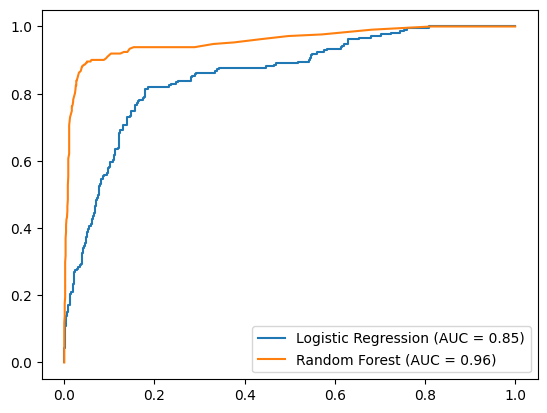

In [44]:
# Calculate ROC curves
# auc score
logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

random_forest_roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Create a bar chart for ROC scores
# models = ['Logistic Regression', 'Random Forest']
# roc_scores = [logistic_roc_auc, random_forest_roc_auc]

# plt.figure(figsize=(10, 5))
# plt.bar(models, roc_scores, color=['blue', 'green'])
# plt.ylabel('ROC AUC Score')
# plt.title('ROC AUC Score Comparison')
# plt.ylim(0.0, 1.0)

# Plot ROC curves on the same chart
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_roc_auc:.2f})')
plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest (AUC = {random_forest_roc_auc:.2f})')
plt.legend(loc='lower right')

plt.show()

### Save model

In [45]:
# Save the best model to a file using pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

#### Testing the model: 
###### Make prediction on new data

In [46]:
# import pickle
# # Load the saved model from the file
# model_file = 'random_forest_model.pkl'

# with open(model_file, 'rb') as f_in:
#   rd = pickle.load( f_in)

In [47]:
# customer ={
#     'customerid':'90010',
#     'tenure':'0.0',
#     'preferredlogindevice':'phone',
#     'citytier':'5',
#     'hourspendonapp':'4.0',
#     'numberofdeviceregistered':'2',
#     'preferedordercat':'laptop_&_accessory',
#     'satisfactionscore':'3',
#     'maritalstatus':'single',
#     'numberofaddress':'12',
#     'complain':'0',
#     'couponused':'0.0',
#     'ordercount':'0.0',
#     'daysincelastorder':'0.0',
#     'cashbackamount':'100.07',
#     'tenure_group':'New'
# }

In [48]:
# # Convert the customer data to a DataFrame
# customer_df = pd.DataFrame([customer])
# categorical_features = ['preferredlogindevice','preferedordercat','maritalstatus', 'tenure_group']
# for feature in categorical_features:
#     customer_df[feature] = label_encoder.fit_transform(customer_df[feature])

# # Predict the probability of churn
# churn_prob = rd.predict_proba(customer_df)[0, 1]
# churn_pred = rd.predict(customer_df)

# # Print the results
# print('input', customer)
# print(f"Churn Probability: {churn_prob}")
# print(f"Churn Prediction: {churn_pred}")